In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats import inter_rater

In [176]:
## Raccolta dati da file

workers_answers = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_answers.csv")
workers_questionnaire = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_questionnaire.csv")
workers_dimensions_selection = pd.read_csv("Crowd_Frame riscaricato/data/result/task1/Dataframe/workers_dimensions_selection.csv")


/var/folders/4l/y4hbjt2s5tj88m9nnzs8x9qw0000gn/T/ipykernel_58640/1252595924.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


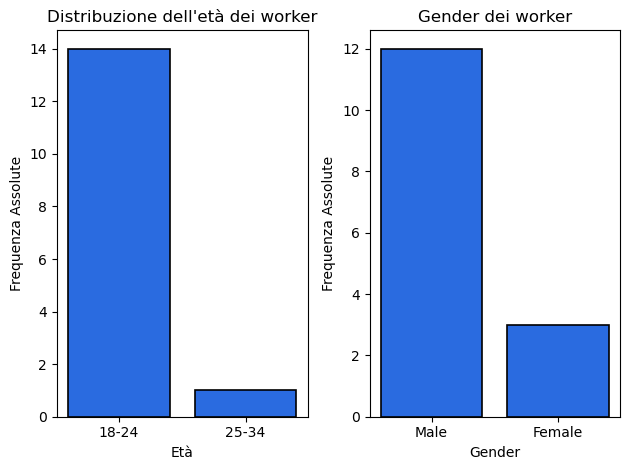

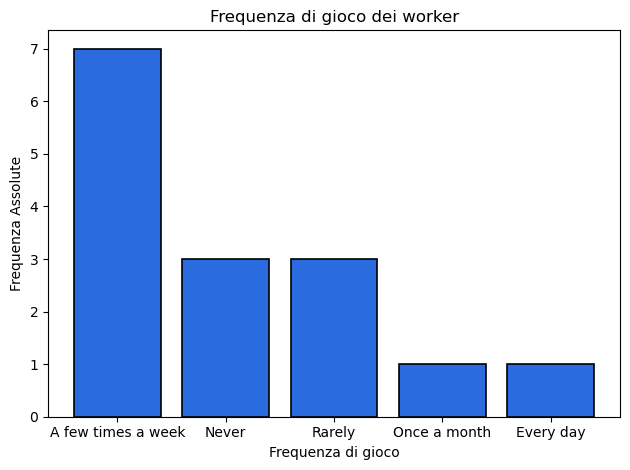

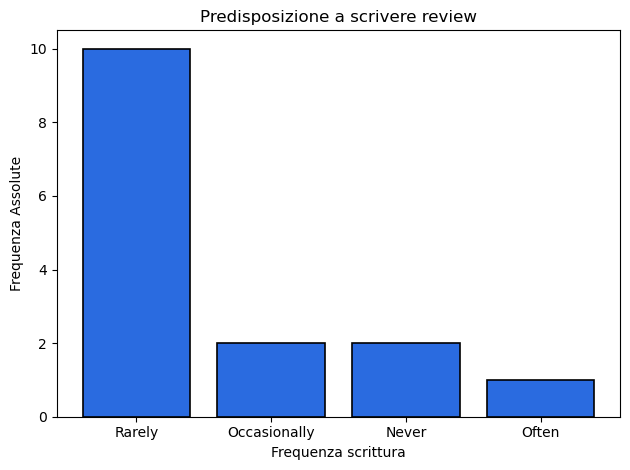

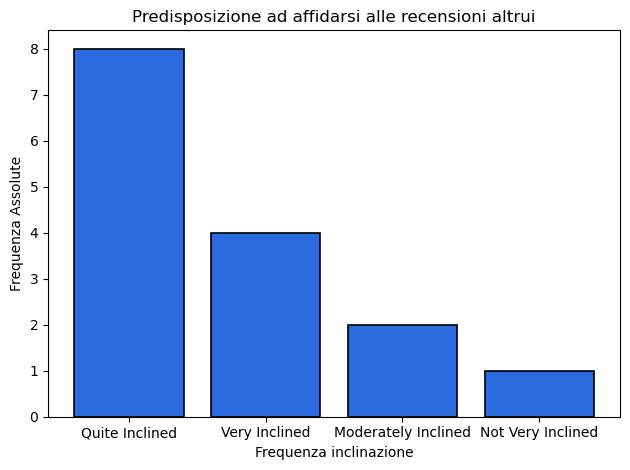

question_answer_text
Quite inclined (yes, they influence my purchase decision)    0.533333
Very inclined (yes, I decisively base my choices)            0.266667
Moderately inclined (yes, I consider them but not only)      0.133333
Not very inclined (no, I consider other factors)             0.066667
Name: count, dtype: float64


In [165]:
'''

4.b
Calcolate le frequenze relative delle risposte date dai lavoratori al questionario

'''

#Age

Age = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Age"]
absolute_frequencies_Age = Age['question_answer_text'].value_counts()
relative_frequencies_Age = absolute_frequencies_Age / len(Age)

# I dati relativi alle frequenze
categories = relative_frequencies_Age.index
frequencies = absolute_frequencies_Age.values

# Creazione del barplot
plt.subplot(1, 2, 1)
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Età')
plt.ylabel('Frequenza Assolute')
plt.title('Distribuzione dell\'età dei worker')

plt.tight_layout()

# Visualizzazione del barplot

''''''''''''''''''''''''''''''''''''''''''''''''
#Gender

Gender = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Gender"]
absolute_frequencies_Gender = Gender['question_answer_text'].value_counts()
relative_frequencies_Gender = absolute_frequencies_Gender / len(Gender)

# I dati relativi alle frequenze
categories = absolute_frequencies_Gender.index
frequencies = absolute_frequencies_Gender.values

# Creazione del barplot
plt.subplot(1, 2, 2)
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Gender')
plt.ylabel('Frequenza Assolute')
plt.title('Gender dei worker')

plt.tight_layout()
plt.savefig('plot/distribuzione_Eta_Gender.pdf')

# Visualizzazione del barplot
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''
#Gaming_Frequency

Gaming_Frequency = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Gaming Frequency"]
absolute_frequencies_Gaming_Frequency = Gaming_Frequency['question_answer_text'].value_counts()
relative_frequencies_Gaming_Frequency = absolute_frequencies_Gaming_Frequency / len(Gaming_Frequency)

# I dati relativi alle frequenze
categories = absolute_frequencies_Gaming_Frequency.index
frequencies = absolute_frequencies_Gaming_Frequency.values

# Creazione del barplot
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Frequenza di gioco')
plt.ylabel('Frequenza Assolute')
plt.title('Frequenza di gioco dei worker')

plt.tight_layout()
plt.savefig('plot/distribuzione_Gaming_Frequency.pdf')

# Visualizzazione del barplot
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''
#Write_Reviews

Write_Reviews = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Reliance on Reviews"]
absolute_frequencies_Write_Reviews = Write_Reviews['question_answer_text'].value_counts()
relative_frequencies_Write_Reviews = absolute_frequencies_Write_Reviews / len(Write_Reviews)
# I dati relativi alle frequenze
categories = absolute_frequencies_Write_Reviews.index
frequencies = absolute_frequencies_Write_Reviews.values

# Creazione del barplot
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Frequenza scrittura')
plt.ylabel('Frequenza Assolute')
plt.title('Predisposizione a scrivere review')
plt.xticks(categories, ['Rarely', 'Occasionally', 'Never', 'Often'])


plt.tight_layout()
plt.savefig('plot/distribuzione_Write_Reviews.pdf')

# Visualizzazione del barplot
plt.show()

''''''''''''''''''''''''''''''''''''''''''''''''''
# Trust_Review

Trust_Reviews = workers_questionnaire[workers_questionnaire['question_attribute_name'] == "Trust in Reviews"]
absolute_frequencies_Trust_Reviews = Trust_Reviews['question_answer_text'].value_counts()
relative_frequencies_Trust_Reviews = absolute_frequencies_Trust_Reviews / len(Trust_Reviews)
# I dati relativi alle frequenze
categories = absolute_frequencies_Trust_Reviews.index
frequencies = absolute_frequencies_Trust_Reviews.values

# Creazione del barplot
plt.bar(categories, frequencies, color='#2A6BE0', edgecolor='black', linewidth=1.2)

# Aggiunta di etichette e titoli
plt.xlabel('Frequenza inclinazione')
plt.ylabel('Frequenza Assolute')
plt.title('Predisposizione ad affidarsi alle recensioni altrui')
plt.xticks(categories, ['Quite Inclined', 'Very Inclined', 'Moderately Inclined', 'Not Very Inclined'])

plt.tight_layout()
plt.savefig('plot/distribuzione_Trust_Review.pdf')

# Visualizzazione del barplot
plt.show()

print(relative_frequencies_Trust_Reviews)

In [1]:
'''

4.c
Scegliete una delle dimensioni categoriali e calcolate il percent agreement tra
worker per i valori forniti

'''
import math

def crea_coppie_worker(vettore):
    # Funzione per creare tutte le possibili coppie di worker_id
    def tutte_le_coppie():
        coppie = []
        for i in range(len(vettore)):
            for j in range(i + 1, len(vettore)):
                coppia = (vettore[i], vettore[j])
                coppie.append(coppia)
        return coppie

    # Richiama la funzione per ottenere tutte le coppie
    tutte_le_coppie = tutte_le_coppie()
    # Filtra le coppie per escludere quelle con valori invertiti
    coppie_filtrate = [coppia for coppia in tutte_le_coppie if coppia[0] != coppia[1]]

    return coppie_filtrate

def confronta_vettori999(vettore1, vettore2):
    # Verifica se la lunghezza dei vettori è la stessa
    if len(vettore1) != len(vettore2):
        raise ValueError("I vettori devono avere la stessa lunghezza")

    # Conta il numero di posizioni con valori uguali, escludendo i valori NaN e le coppie con valore 999
    num_valori_uguali = sum(
        (math.isclose(val1, val2) if not (math.isnan(val1) or math.isnan(val2) or val1 == 999 or val2 == 999) else False)
        for val1, val2 in zip(vettore1, vettore2)
    )

    return num_valori_uguali


def estrai_copia_worker_id_da_tuple(tupla):
    if len(tupla) != 2:
        print("La tupla deve contenere esattamente due elementi.")
        return None

    worker_id_originale = tupla[0]
    worker_id_copia = tupla[1]
    return worker_id_originale, worker_id_copia

def creazione_riga_document_id(w1_id, caratteristica):

    #restituisce valore dato dal worker su una specifica caratteristica, eliminadno i doppioni
    row_w1 = workers_answers.loc[workers_answers['worker_id'] == w1_id, ['document_id',caratteristica ]]

    # Elimina la prima riga duplicata
    riga_w1_finale = row_w1.drop_duplicates(subset='document_id')

    return riga_w1_finale

import pandas as pd


def crea_df_personalizzato2(df, lista_document_id):
    nuova_riga = {colonna: 999 for colonna in lista_document_id}

    for index, row in df.iterrows():
        document_id = row['document_id']

        if document_id in lista_document_id:
            nuova_riga[document_id] = row['Reliability_index']

    nuovo_df = pd.DataFrame([nuova_riga])

    return nuovo_df



def crea_df_personalizzato(df, lista_document_id):
    nuove_righe = []

    for index, row in df.iterrows():
        nuova_riga = {colonna: 999 for colonna in lista_document_id}
        document_id = row['document_id']

        if document_id in lista_document_id:
            nuova_riga[document_id] = row['Reliability_index']

        nuove_righe.append(nuova_riga)

    nuovo_df = pd.DataFrame(nuove_righe)

    return nuovo_df






worker_ids_unici = workers_answers['worker_id'].unique()
document_id_unici = workers_answers['document_id'].unique()

lista = crea_coppie_worker(worker_ids_unici)
listaNuemri = []


for tupla in lista:

    worker_1, worker_2 = estrai_copia_worker_id_da_tuple(tupla)
    #prima chiamata con il primo workid
    documenutiValutatiW1 = creazione_riga_document_id(worker_1, 'Reliability_index')
    #seconda chiamata con il secondo workid
    documenutiValutatiW2 = creazione_riga_document_id(worker_2, 'Reliability_index')
    #dopo aver creato il df con le risposte di date al tutte le domadne di un determinato worker, creo la matrice finale con tutti i documenti e i valori sia quelli persenrti sia queli che a cui non ha risposto, dove trovate il valore 999, significa che il worker non ha risposto a quella domanda
    df_finaleW1 = crea_df_personalizzato2(documenutiValutatiW1,document_id_unici)
    df_finaleW2 = crea_df_personalizzato2(documenutiValutatiW2,document_id_unici)

    #display(df_finaleW1,df_finaleW2 )

    prima_riga_arrayW1 = df_finaleW1.iloc[0].to_numpy()
    prima_riga_arrayW2 = df_finaleW2.iloc[0].to_numpy()
    #nuemro di valori uguali fra i due worker
    conto = confronta_vettori999(prima_riga_arrayW1,prima_riga_arrayW2)
    listaNuemri.append(conto)
    display(listaNuemri)






NameError: name 'workers_answers' is not defined

In [227]:
'''

4.d
Calcolate la confidence media espressa dai worker nel valutare ciascuna
recensione

'''
# vado a selezionare solo le colonne che voglio
selected_columns = ['worker_id','document_id', 'selection_value']

# Crea un nuovo dataframe includendo solo le colonne selezionate
dimensions_selections = workers_dimensions_selection[selected_columns].copy()

#media valutazione data per ogni documento, ( slider )
media_valutazioni_D = dimensions_selections.groupby('document_id')['selection_value'].mean()
display(media_valutazioni_D)

#media valutazione data per ogni documento, da ogni worker, ( slider )
media_valutazioni_W = dimensions_selections.groupby('worker_id')['selection_value'].mean()
display(media_valutazioni_W)

document_id
B00004SVUZ    49.431818
B00006JN5L    39.500000
B0001DHQPI    75.833333
B0002KMHD6    42.166667
B000O39U3Q    80.400000
B001DYVHY0    78.428571
B0029MAXR2    76.000000
B003TO59D2    33.250000
B0041RUM0Q    69.194805
B0050SYWGU    79.888889
B005ZNWT4C    85.875000
B00PNVOBTC    66.666667
B00QTSR5GO    86.000000
B015XC3B46    66.411765
B01G6LXXWI    56.125000
Name: selection_value, dtype: float64

worker_id
1ONCOX6OYV8XZJ    83.687500
7GFH0CXPHPTSPX    58.800000
B0ARNFCRSNEXAS    69.142857
B3QHTCHNCMXQ4H    85.000000
CNZQBVRXLWYZG8    87.142857
DLNY6ZIJOABZLJ    54.000000
HAA3KNPKCB5DSG    92.500000
ISGHMQO0AXKFXS    67.000000
IZ2TQI5OCUGD1N    94.111111
JLVBHXOL0E65XT    65.571429
KWJ2MEMELZHTD1    44.560440
L292E0RLKG4B7U    48.875000
MXLX3Z0LDZTDTY    80.000000
OMLUXZWFN4LV8O    30.566667
T4MEORG9STZITP    63.875000
Name: selection_value, dtype: float64

In [228]:
'''

4.e
Calcolate il tempo medio impiegato dai worker per valutare ciascuna recensione

'''
#calcolo del tempo impiegato
time_media = workers_answers[['worker_id', 'document_id', 'time_start', 'time_end']]
time_media = time_media.copy()
time_media['time_spedn'] = time_media['time_end'] - time_media['time_start']
time_media = time_media.drop(['time_start', 'time_end'], axis=1)


#Calcoliamo il tempo medio per worker
tempo_medio_W = time_media.groupby('worker_id')['time_spedn'].mean()
display(tempo_medio_W)

#Calcoliamo il tempo medio per documento
tempo_medio_D = time_media.groupby('document_id')['time_spedn'].mean()
display(tempo_medio_D)


,worker_id,document_id,time_spedn
0,1ONCOX6OYV8XZJ,B00PNVOBTC,112.39
1,1ONCOX6OYV8XZJ,B0050SYWGU,177.34
2,1ONCOX6OYV8XZJ,B0041RUM0Q,353.43
5,1ONCOX6OYV8XZJ,B005ZNWT4C,103.12
6,1ONCOX6OYV8XZJ,B015XC3B46,10.51
...,...,...,...
87,T4MEORG9STZITP,B0002KMHD6,447.40
90,T4MEORG9STZITP,B015XC3B46,125.06
91,T4MEORG9STZITP,B00PNVOBTC,125.46
92,T4MEORG9STZITP,B0041RUM0Q,119.69


worker_id
1ONCOX6OYV8XZJ    151.358
7GFH0CXPHPTSPX    118.648
B0ARNFCRSNEXAS    153.752
B3QHTCHNCMXQ4H     81.260
CNZQBVRXLWYZG8    125.464
DLNY6ZIJOABZLJ    207.452
HAA3KNPKCB5DSG    844.542
ISGHMQO0AXKFXS    125.638
IZ2TQI5OCUGD1N    289.696
JLVBHXOL0E65XT    121.256
KWJ2MEMELZHTD1    156.132
L292E0RLKG4B7U    218.028
MXLX3Z0LDZTDTY    451.120
OMLUXZWFN4LV8O    344.378
T4MEORG9STZITP    187.086
Name: time_spedn, dtype: float64

document_id
B00004SVUZ    207.062
B00006JN5L     74.638
B0001DHQPI    396.858
B0002KMHD6    254.228
B000O39U3Q    134.906
B001DYVHY0    139.556
B0029MAXR2    225.012
B003TO59D2    226.472
B0041RUM0Q    227.638
B0050SYWGU    143.640
B005ZNWT4C    917.124
B00PNVOBTC    183.056
B00QTSR5GO    128.616
B015XC3B46     72.586
B01G6LXXWI    244.418
Name: time_spedn, dtype: float64

In [225]:
#da verificare
total_units = len(workers_answers)
matching_units = workers_answers[workers_answers['Reliability_value'] == workers_answers['Reliability_value']].shape[0]

percent_agreement = (matching_units / total_units) * 100

In [222]:
# Inizializza una lista per i risultati
result_list = []

# Cicla sui valori unici della colonna document_id
for doc_id in workers_answers['document_id'].unique():
    # Filtra il DataFrame per il documento corrente
    doc_df = workers_answers[workers_answers['document_id'] == doc_id]

    # Conserva solo la prima risposta per ogni worker_id
    unique_worker_ids = doc_df['worker_id'].unique()
    for worker_id in unique_worker_ids:
        first_answer_idx = doc_df[doc_df['worker_id'] == worker_id].index[0]
        first_answer_row = doc_df.loc[first_answer_idx]
        result_list.append({'document_id': doc_id, 'Neutrality_index': first_answer_row['Neutrality_index']})

# Crea un DataFrame dai risultati
result_df = pd.DataFrame(result_list)
#print(result_df)# Visualizza il DataFrame risultante
print(result_df)

# Raggruppa per document_id e calcola la percentuale di accordo
grouped_df = result_df.groupby('document_id')['Neutrality_index'].value_counts(normalize=True).mul(100).unstack().fillna(0)

# Visualizza il DataFrame risultante
#print(grouped_df)

   document_id  Neutrality_index
0   B00PNVOBTC               4.0
1   B00PNVOBTC               3.0
2   B00PNVOBTC               4.0
3   B00PNVOBTC               2.0
4   B00PNVOBTC               3.0
..         ...               ...
70  B00QTSR5GO               4.0
71  B00QTSR5GO               3.0
72  B00QTSR5GO               4.0
73  B00QTSR5GO               3.0
74  B00QTSR5GO               2.0

[75 rows x 2 columns]


In [223]:
grouped_df = result_df.groupby(['document_id', 'Neutrality_index']).size().reset_index(name='counts')

# Crea un DataFrame pivot per avere le Neutrality_description come colonne
pivot_df = grouped_df.pivot(index='document_id', columns='Neutrality_index', values='counts').fillna(0)

# Calcola la percentuale di accordo per ciascun document_id
total_documents = pivot_df.shape[0]
matching_values = pivot_df.apply(lambda row: row.max(), axis=1)
percent_agreement = (matching_values / total_documents) * 100

# Visualizza il DataFrame risultante con la percentuale di accordo per ciascun document_id
result_percent_df = pd.DataFrame({'document_id': percent_agreement.index, 'Percent_Agreement': percent_agreement.values})

display(grouped_df)

,document_id,Neutrality_index,counts
0,B00004SVUZ,1.0,1
1,B00004SVUZ,2.0,1
2,B00004SVUZ,3.0,3
3,B00006JN5L,0.0,2
4,B00006JN5L,2.0,2
5,B00006JN5L,4.0,1
6,B0001DHQPI,0.0,1
7,B0001DHQPI,1.0,2
8,B0001DHQPI,3.0,2
9,B0002KMHD6,2.0,1


In [226]:
#PULIZIA worker_answers: il document_id in molti casi in worker_answers si ripeteva più di 5 volte, forse perchè il worker andava avanti e indietro nel task
#pertanto si seleziona quello cpn il time submit più recente

workers_answers['time_submit_parsed'] = pd.to_datetime(workers_answers['time_submit_parsed'])

# Itera su ciascun worker_id, preso una volta sola
for worker_id in workers_answers['worker_id'].unique():
    # Filtra le righe relative al worker_id corrente
    worker_df = workers_answers[workers_answers['worker_id'] == worker_id]

    # Trova i document_id duplicati con il time_submit_parsed più basso 
    duplicate_rows = worker_df[worker_df.duplicated(subset=['document_id'], keep='last')]

    # Ottiene gli indici delle righe da eliminare
    rows_to_drop = duplicate_rows.index
    print(rows_to_drop)

    # Elimina le righe non necessarie
    workers_answers = workers_answers.drop(rows_to_drop)

Index([3, 4], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([22, 23, 24, 25], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([45], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([57, 58, 59, 60, 62, 63], dtype='int64')
Index([68, 69], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')
Index([85, 86, 88, 89], dtype='int64')


/var/folders/4l/y4hbjt2s5tj88m9nnzs8x9qw0000gn/T/ipykernel_58640/945041542.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  workers_answers['time_submit_parsed'] = pd.to_datetime(workers_answers['time_submit_parsed'])


In [171]:
#CREAIONE MATRICE WORKER-TASK
#selezionamo i dati che ci interessano da workers_answers, nel nostro caso abbiamo scelto la categoria Completeness
selected_columns = ["document_id", "worker_id", "Completeness_value"]
df_selected = workers_answers[selected_columns]

# Creazione matrice worker task: si usa pivot per trasformare i dati
workers_task = df_selected.pivot(index="worker_id", columns="document_id", values="Completeness_value")


#CREAZIONE MATRICE CATEGORIA-TASK
#seleziona le colonne volute, nel nostro caso abbiamo scelto la categoria Completeness
selected_columns = ["document_id", "Completeness_value"]
df_selected = workers_answers[selected_columns]

#df_selected.columns.name = None

# creazione matrice categoria / task: la funzione pivot_table conta gli elementi uguali
pivot_table = pd.pivot_table(df_selected, index='document_id', columns='Completeness_value', aggfunc='size', fill_value=0)

In [172]:
import math
import statistics
from scipy.stats import hmean

numero_worker = len(pivot_table)
numero_task = 15

#coppie possibili: 2/m(m-1) 
coppie_possibili = 2/(numero_worker*(numero_worker-1))

pairwise_agreement_list = []

#somma coppie worker-worker sono in accordo: somma dei coefficenti binomiali
for row in pivot_table.itertuples():
    valori_documento = list(row[1:])
    somma_coefficienti = 0
    
    for i in valori_documento:
        coefficiente_binomiale = math.comb(i, 2)
        somma_coefficienti += coefficiente_binomiale
    
    pairwise_agreement_list.append(somma_coefficienti)
    

#valore del pairwise agreement per ogni colonna
pairwise_agreement_list = [i * coppie_possibili for i in pairwise_agreement_list]

#Pariwise agreement (P) = media dei valori di pairwise_agreement di ogni colonna
pairwise_agreement = statistics.mean(pairwise_agreement_list)


pairwise_agreement_atteso = []

#calcolo di k di fleiss: somma dei valori per ogni colonna
for column in pivot_table.columns:
    somma_valori_colonna = pivot_table[column].sum()
    pairwise_agreement_atteso.append(somma_valori_colonna)

#dividere ogni somma per numero_task*numero_worker
pairwise_agreement_atteso = [i / (numero_task*numero_worker) for i in pairwise_agreement_atteso]

#Pairwise agreement atteso (Pe) = somma dei quadrati delle proporzioni di assegnamenti
pairwise_agreement_atteso = sum([pow(i, 2) for i in pairwise_agreement_atteso])


#calcolo della k di Fleiss: P-Pe / 1-Pe
k = (pairwise_agreement - pairwise_agreement_atteso) / (1 - pairwise_agreement_atteso)
k

0.005730228689267952

In [173]:
from pyirr import read_data, kappam_fleiss
kappam_fleiss(pivot_table, detail=True)
pivot_table

ModuleNotFoundError: No module named 'pyirr'

In [220]:
#ELIMINARE FINITI I CONTROLLI!!!!!!!!

from statsmodels.stats.inter_rater import fleiss_kappa

selected_columns = ["document_id", "Neutrality_value"]
df_selected = workers_answers[selected_columns]

df_selected.columns.name = None
# Usa la funzione pivot_table per ottenere la tabella desiderata con il conteggio degli elementi uguali
pivot_table = pd.pivot_table(df_selected, index='document_id', columns='Neutrality_value', aggfunc='size', fill_value=0)

#calcolo fleiss_kappa
risultato = fleiss_kappa(pivot_table)
risultato2 = fleissKappa(pivot_table,5)
display(risultato2)

#answers =  5 , #workers =  15 , #type of answers =  15


TypeError: 'float' object is not iterable

In [131]:
time_media = workers_answers[['worker_id', 'document_id', 'time_start', 'time_end']]
time_media = time_media.copy()
time_media['time_spedn'] = time_media['time_end'] - time_media['time_start']
time_media = time_media.drop(['time_start', 'time_end'], axis=1)
display(time_media)

,worker_id,document_id,time_spedn
0,1ONCOX6OYV8XZJ,B00PNVOBTC,112.39
1,1ONCOX6OYV8XZJ,B0050SYWGU,177.34
2,1ONCOX6OYV8XZJ,B0041RUM0Q,353.43
5,1ONCOX6OYV8XZJ,B005ZNWT4C,103.12
6,1ONCOX6OYV8XZJ,B015XC3B46,10.51
...,...,...,...
87,T4MEORG9STZITP,B0002KMHD6,447.40
90,T4MEORG9STZITP,B015XC3B46,125.06
91,T4MEORG9STZITP,B00PNVOBTC,125.46
92,T4MEORG9STZITP,B0041RUM0Q,119.69


In [132]:

#Calcoliamo il tempo medio per worker
tempo_medio_W = time_media.groupby('worker_id')['time_spedn'].mean()
display(tempo_medio_W)

#Calcoliamo il tempo medio per documento
tempo_medio_D = time_media.groupby('document_id')['time_spedn'].mean()
display(tempo_medio_D)



worker_id
1ONCOX6OYV8XZJ    151.358
7GFH0CXPHPTSPX    118.648
B0ARNFCRSNEXAS    153.752
B3QHTCHNCMXQ4H     81.260
CNZQBVRXLWYZG8    125.464
DLNY6ZIJOABZLJ    207.452
HAA3KNPKCB5DSG    844.542
ISGHMQO0AXKFXS    125.638
IZ2TQI5OCUGD1N    289.696
JLVBHXOL0E65XT    121.256
KWJ2MEMELZHTD1    156.132
L292E0RLKG4B7U    218.028
MXLX3Z0LDZTDTY    451.120
OMLUXZWFN4LV8O    344.378
T4MEORG9STZITP    187.086
Name: time_spedn, dtype: float64

document_id
B00004SVUZ    207.062
B00006JN5L     74.638
B0001DHQPI    396.858
B0002KMHD6    254.228
B000O39U3Q    134.906
B001DYVHY0    139.556
B0029MAXR2    225.012
B003TO59D2    226.472
B0041RUM0Q    227.638
B0050SYWGU    143.640
B005ZNWT4C    917.124
B00PNVOBTC    183.056
B00QTSR5GO    128.616
B015XC3B46     72.586
B01G6LXXWI    244.418
Name: time_spedn, dtype: float64

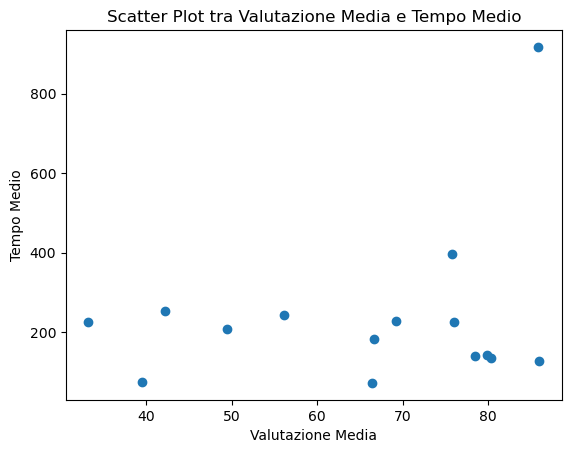

,valutazione_media,tempo_medio
document_id,,
B00004SVUZ,49.431818,207.062
B00006JN5L,39.500000,74.638
B0001DHQPI,75.833333,396.858
B0002KMHD6,42.166667,254.228
B000O39U3Q,80.400000,134.906
B001DYVHY0,78.428571,139.556
B0029MAXR2,76.000000,225.012
B003TO59D2,33.250000,226.472
B0041RUM0Q,69.194805,227.638


In [134]:
import pandas as pd
import matplotlib.pyplot as plt

#unisco i due dataframe per avere valutazione medi e tempo medio per ogni docuemnto
merged_dataset = pd.merge(media_valutazioni_D, tempo_medio_D, on='document_id')

merged_dataset = merged_dataset.rename(columns={'selection_value': 'valutazione_media',
                                                'time_spedn': 'tempo_medio'})

# Crea il grafico
plt.scatter(merged_dataset['valutazione_media'], merged_dataset['tempo_medio'])
plt.xlabel('Valutazione Media')
plt.ylabel('Tempo Medio')
plt.title('Scatter Plot tra Valutazione Media e Tempo Medio')
plt.show()

'''
Un'analisi può esser che non si notano correlazioni con tempo e valutazione, nel senso che una valutazione alta non equivale a un tempo medio elevato di rispota,
anche se poteva esser cosi perche per avere una valutazione alta, la recensione deve essere molto prolissa e ben sturitturata, quindi ci vuoleva mooto tempo ma non  e coi.
'''


display(merged_dataset)

In [182]:
def crea_coppie_worker(vettore):
    # Funzione per creare tutte le possibili coppie di worker_id
    def tutte_le_coppie():
        coppie = []
        for i in range(len(vettore)):
            for j in range(i+1, len(vettore)):
                coppia = (vettore[i], vettore[j])
                coppie.append(coppia)
        return coppie

    # Richiama la funzione per ottenere tutte le coppie
    tutte_le_coppie = tutte_le_coppie()

    # Filtra le coppie per escludere quelle con valori invertiti
    coppie_filtrate = [coppia for coppia in tutte_le_coppie if coppia[0] != coppia[1]]

    return coppie_filtrate

In [218]:

worker_ids_unici = workers_answers['worker_id'].unique()

document_id_unici = workers_answers['document_id'].unique()

lista = crea_coppie_worker(worker_ids_unici)

display(lista)
display(document_id_unici)


[('1ONCOX6OYV8XZJ', '7GFH0CXPHPTSPX'),
 ('1ONCOX6OYV8XZJ', 'B0ARNFCRSNEXAS'),
 ('1ONCOX6OYV8XZJ', 'B3QHTCHNCMXQ4H'),
 ('1ONCOX6OYV8XZJ', 'CNZQBVRXLWYZG8'),
 ('1ONCOX6OYV8XZJ', 'DLNY6ZIJOABZLJ'),
 ('1ONCOX6OYV8XZJ', 'HAA3KNPKCB5DSG'),
 ('1ONCOX6OYV8XZJ', 'ISGHMQO0AXKFXS'),
 ('1ONCOX6OYV8XZJ', 'IZ2TQI5OCUGD1N'),
 ('1ONCOX6OYV8XZJ', 'JLVBHXOL0E65XT'),
 ('1ONCOX6OYV8XZJ', 'KWJ2MEMELZHTD1'),
 ('1ONCOX6OYV8XZJ', 'L292E0RLKG4B7U'),
 ('1ONCOX6OYV8XZJ', 'MXLX3Z0LDZTDTY'),
 ('1ONCOX6OYV8XZJ', 'OMLUXZWFN4LV8O'),
 ('1ONCOX6OYV8XZJ', 'T4MEORG9STZITP'),
 ('7GFH0CXPHPTSPX', 'B0ARNFCRSNEXAS'),
 ('7GFH0CXPHPTSPX', 'B3QHTCHNCMXQ4H'),
 ('7GFH0CXPHPTSPX', 'CNZQBVRXLWYZG8'),
 ('7GFH0CXPHPTSPX', 'DLNY6ZIJOABZLJ'),
 ('7GFH0CXPHPTSPX', 'HAA3KNPKCB5DSG'),
 ('7GFH0CXPHPTSPX', 'ISGHMQO0AXKFXS'),
 ('7GFH0CXPHPTSPX', 'IZ2TQI5OCUGD1N'),
 ('7GFH0CXPHPTSPX', 'JLVBHXOL0E65XT'),
 ('7GFH0CXPHPTSPX', 'KWJ2MEMELZHTD1'),
 ('7GFH0CXPHPTSPX', 'L292E0RLKG4B7U'),
 ('7GFH0CXPHPTSPX', 'MXLX3Z0LDZTDTY'),
 ('7GFH0CXPHPTSPX', 'OMLU

array(['B00PNVOBTC', 'B0050SYWGU', 'B0041RUM0Q', 'B005ZNWT4C',
       'B015XC3B46', 'B0002KMHD6', 'B00006JN5L', 'B0001DHQPI',
       'B001DYVHY0', 'B003TO59D2', 'B0029MAXR2', 'B000O39U3Q',
       'B00004SVUZ', 'B01G6LXXWI', 'B00QTSR5GO'], dtype=object)

[0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
